In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import load_sample_image
from sklearn import datasets
%matplotlib inline

# Example 1 :

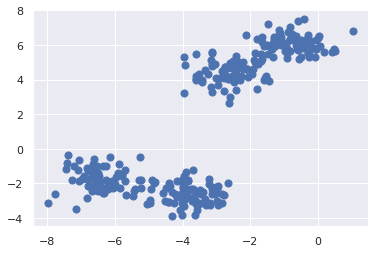

In [2]:
x, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60)
plt.scatter(x[:, 0], x[:, 1], s = 50, cmap = 'viridis');

In [3]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters = 4)
Kmeans.fit(x)
y_means = Kmeans.predict(x)

In [4]:
y_means

array([2, 2, 3, 1, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 1, 1, 0, 3, 2, 3, 2, 3,
       1, 3, 3, 0, 3, 2, 1, 2, 0, 1, 3, 1, 0, 3, 0, 3, 3, 1, 1, 3, 1, 2,
       3, 1, 3, 1, 0, 3, 2, 2, 2, 0, 0, 1, 2, 0, 0, 3, 1, 3, 1, 2, 2, 1,
       2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 3, 0, 3, 2, 0, 3, 2, 0, 3, 0, 2, 1,
       2, 1, 2, 0, 2, 2, 2, 1, 0, 3, 0, 2, 1, 1, 1, 1, 3, 2, 0, 3, 0, 3,
       0, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 0, 0, 0, 2, 1, 3, 0, 3, 0, 2, 0,
       1, 3, 1, 0, 3, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 3, 3, 0, 0, 0, 0, 3,
       1, 2, 0, 1, 0, 0, 1, 0, 3, 0, 3, 2, 1, 2, 3, 2, 1, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 3, 1, 2, 1, 0, 0, 1, 1, 3,
       2, 3, 2, 3, 1, 3, 0, 0, 2, 1, 3, 3, 2, 3, 3, 0, 2, 1, 3, 0, 1, 1,
       0, 3, 0, 1, 1, 2, 3, 2, 2, 2, 0, 2, 2, 0, 3, 2, 1, 1, 3, 0, 1, 3,
       3, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 3, 1, 0, 1, 0, 3, 3, 2,
       1, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 1, 3, 1, 2, 2, 1, 3, 3, 2, 3, 1,
       1, 3, 2, 3, 3, 0, 3, 2, 0, 0, 3, 3, 1, 1], d

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(x, n_clusters, rseed = 2):
    
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    
    while True:
        # 2. a : Assign labels based on closest center
        labels = pairwise_distances_argmin(x, centers)
    
        # 2. b : Find new centers from means of points
        new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])
    
        # 2. c : Check for the convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

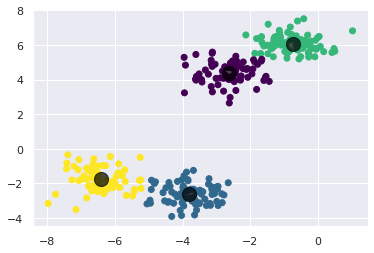

In [6]:
centers, labels = find_clusters(x, 4)
plt.scatter(x[: ,0], x[:, 1], c = y_means, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.7)

# Example 2 :

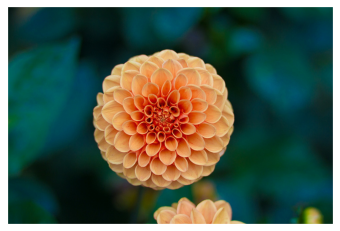

In [11]:
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china);

In [12]:
china.shape

(427, 640, 3)

In [13]:
data = china / 255.0 # use 0-1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [14]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [15]:
def plot_pixels(data, title, colors = None, N = 10000):
        if colors is None:
            colors = data
        
        # Choose a random suset
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T
    
        fig, ax = plt.subplots(1, 2, figsize = (16, 6))
        ax[0].scatter(R, G, color = colors, marker = '.')
        ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0,1), ylim = (0, 1))
    
        ax[1].scatter(R, B, color = colors, marker = '.')
        ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0, 1), ylim = (0, 1))
    
        fig.suptitle(title, size = 30);

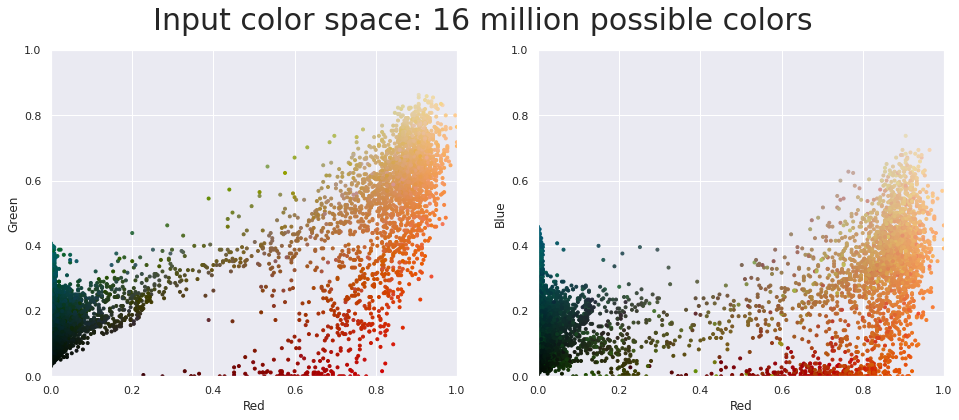

In [16]:
plot_pixels(data, title = 'Input color space: 16 million possible colors')

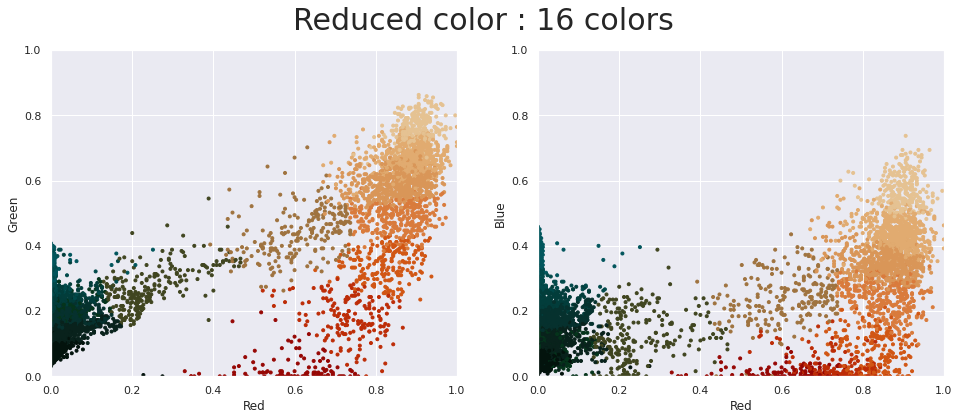

In [17]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
Kmeans1 = MiniBatchKMeans(16)
Kmeans1.fit(data)
new_colors = Kmeans1.cluster_centers_[Kmeans1.predict(data)]

plot_pixels(data, colors = new_colors, title = 'Reduced color : 16 colors')

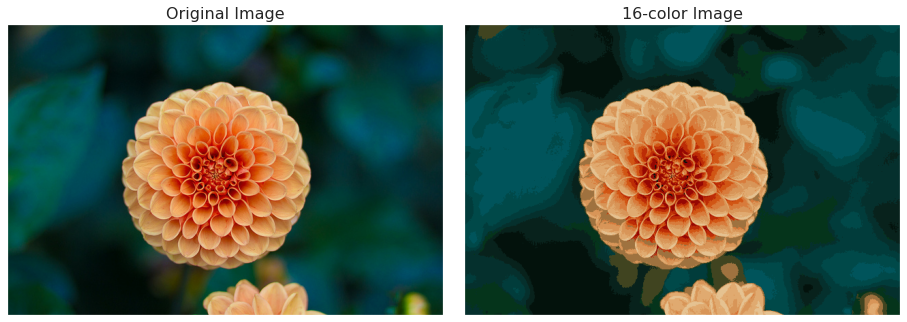

In [18]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks = [], yticks =[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size = 16);

# Example 2.2 :

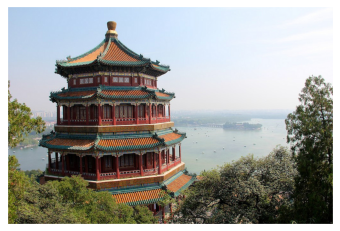

In [3]:
china1 = load_sample_image('china.jpg')
ax1 = plt.axes(xticks = [], yticks = [])
ax1.imshow(china1);

In [4]:
china1.shape

(427, 640, 3)

In [5]:
data1 = china1 / 255.0 # use 0-1 scale
data1 = data1.reshape(427 * 640, 3)
data1.shape

(273280, 3)

In [6]:
def plot_pixels(data1, title, colors = None, N = 10000):
        if colors is None:
            colors = data1
        
        # Choose a random suset
        rng1 = np.random.RandomState(0)
        i = rng1.permutation(data1.shape[0])[:N]
        colors = colors[i]
        R, G, B = data1[i].T
    
        fig, ax1 = plt.subplots(1, 2, figsize = (16, 6))
        ax1[0].scatter(R, G, color = colors, marker = '.')
        ax1[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0,1), ylim = (0, 1))
    
        ax1[1].scatter(R, B, color = colors, marker = '.')
        ax1[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0, 1), ylim = (0, 1))
    
        fig.suptitle(title, size = 30);

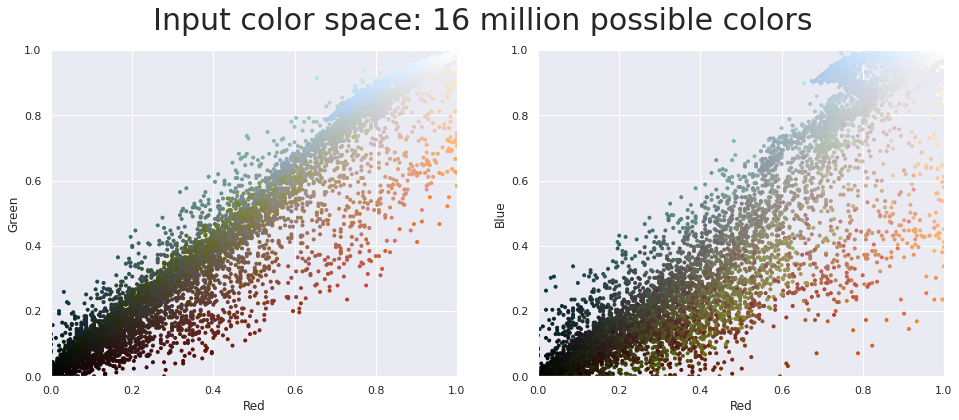

In [7]:
plot_pixels(data1, title = 'Input color space: 16 million possible colors')

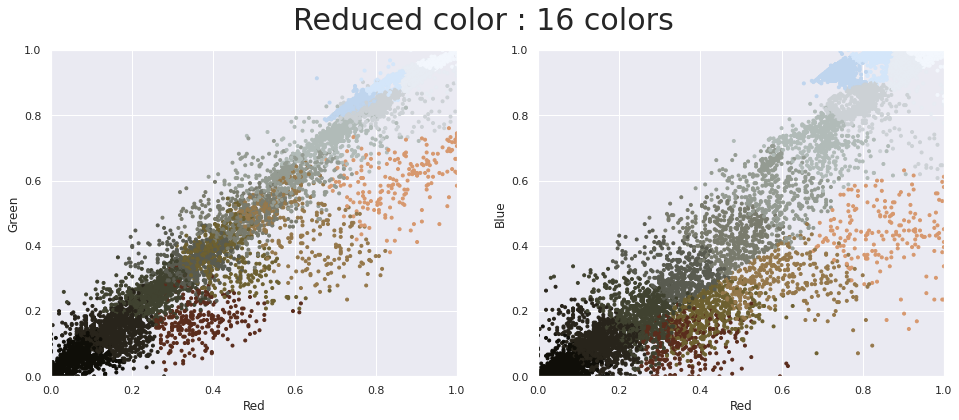

In [9]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
Kmeans2 = MiniBatchKMeans(16)
Kmeans2.fit(data1)
new_colors = Kmeans2.cluster_centers_[Kmeans2.predict(data1)]

plot_pixels(data1, colors = new_colors, title = 'Reduced color : 16 colors')

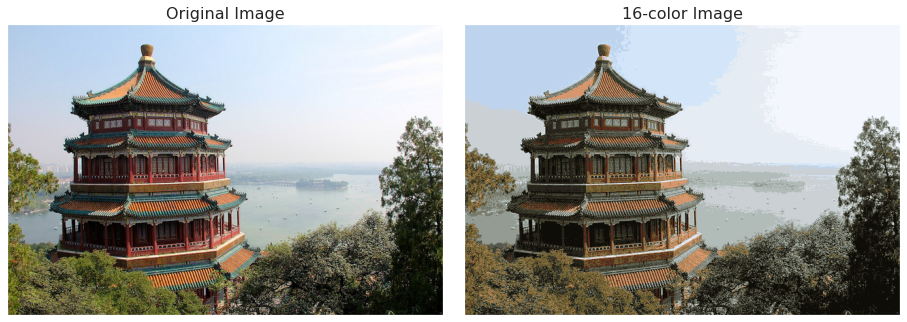

In [10]:
china_recolored1 = new_colors.reshape(china1.shape)

fig, ax1 = plt.subplots(1, 2, figsize = (16, 6), subplot_kw = dict(xticks = [], yticks =[]))
fig.subplots_adjust(wspace = 0.05)
ax1[0].imshow(china1)
ax1[0].set_title('Original Image', size = 16)
ax1[1].imshow(china_recolored1)
ax1[1].set_title('16-color Image', size = 16);